# Import library

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset

In [57]:
df = pd.read_csv('iris_1D_2c.csv')
X = df.iloc[:, 0:1].values
y = df.iloc[:, -1].values
print(type(y))
y = y.astype(np.uint8)

<class 'numpy.ndarray'>


## Draw the dataset

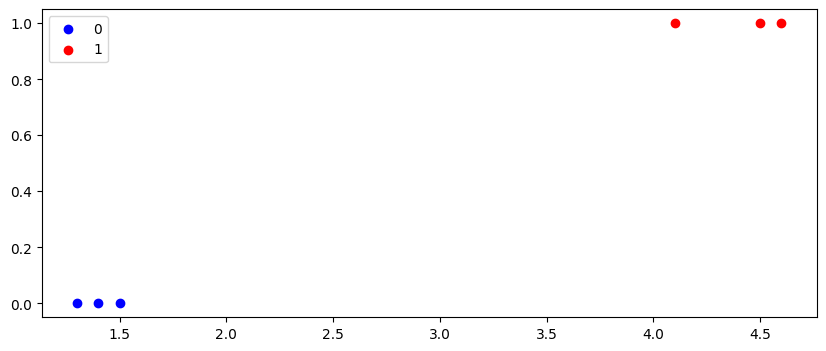

In [58]:
plt.figure(figsize=(10,4))
plt.scatter(X[y == 0][:, 0], y[y == 0], color='b', label='0')
plt.scatter(X[y == 1][:, 0], y[y == 1], color='r', label='1')
plt.legend()
plt.show()



## convert y to one-hot encoding

In [59]:
def convert_one_hot(y, k):
    one_hot = np.zeros((len(y), k))
    one_hot[np.arange(len(y)), y] = 1
    return one_hot

y_one_hot = convert_one_hot(y, 2)
print(y_one_hot)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


## initialize the parameters/ weights

In [60]:
N = len(X)
w = np.array([[0.2], [-0.1]])
b = np.array([[0.1], [0.05]])
lr = 0.1
losses = []
epoch_max = 100
print(w)
print(b)

[[ 0.2]
 [-0.1]]
[[0.1 ]
 [0.05]]


# Training the model

In [61]:
for epoch in range(epoch_max):
    for i in range(N):
        xi = X[i]
        yi = y_one_hot[i]
        # print(yi)
        # print(yi.shape)
        # print()

        yi = yi.reshape(-1, 1)
        # print(yi)
        # print(yi.shape)
        
        # compute z
        z = xi*w + b
            # print(z)
        # predict 
        y_hat = (np.exp(z)) / (np.sum(np.exp(z), axis=0))

        # compute loss_funtion
        loss = -yi.T.dot(np.log(y_hat))
        losses.append(loss[0])
        # computte gradient
        dw_dl = xi*(y_hat - yi)
        db_dl = (y_hat - yi)

        # update weight
        w = w - lr*dw_dl
        b = b - lr*db_dl



# visualize

range(0, 600)
[array([0.48550921]), array([0.41768602]), array([0.32978162]), array([2.92015864]), array([0.30062864]), array([0.10364781]), array([1.18032978]), array([0.89231178]), array([0.74070056]), array([0.71221931]), array([0.13731406]), array([0.06568849]), array([1.14178254]), array([0.85670167]), array([0.72609627]), array([0.54588612]), array([0.14232057]), array([0.065528]), array([1.03555517]), array([0.77579192]), array([0.66991683]), array([0.48882495]), array([0.14530615]), array([0.06478045]), array([0.94218516]), array([0.70567725]), array([0.62115601]), array([0.43699253]), array([0.14762999]), array([0.06391493]), array([0.85933338]), array([0.64420805]), array([0.57806641]), array([0.39147428]), array([0.1491891]), array([0.0629164]), array([0.78599089]), array([0.59027867]), array([0.53986386]), array([0.35165866]), array([0.1499603]), array([0.06178992]), array([0.72112675]), array([0.5428757]), array([0.50586315]), array([0.31691631]), array([0.14997341]), arra

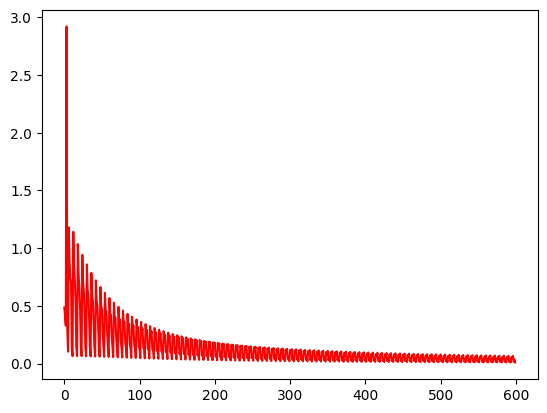

In [62]:
x_axis = range(len(losses))
print(x_axis)
print(losses)
plt.plot(x_axis,losses, color="r")
plt.show()

Test

In [65]:
score = []

for i in range(N):
    xi = X[i]
    yi = y_one_hot[i]
    yi = yi.reshape((-1, 1))

    z = xi*w + b
    score.append(z)

In [68]:
print(score)

[array([[ 1.56757503],
       [-1.27757503]]), array([[ 1.67923788],
       [-1.39923788]]), array([[ 1.45591218],
       [-1.15591218]]), array([[-1.89397321],
       [ 2.49397321]]), array([[-1.44732183],
       [ 2.00732183]]), array([[-2.00563606],
       [ 2.61563606]])]


In [71]:
predict_class = np.argmax(score, axis=1)
print(predict_class)

[[0]
 [0]
 [0]
 [1]
 [1]
 [1]]
